In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 線形代数用のライプラリ
import scipy.linalg as linalg

# 最適化計算（最小値）用の関数
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

# requests : Webのデータを送受信する
import requests
# zipfile : ZIP形式ファイルを読み書きする
import zipfile
# ファイルを読み書きする
from io import StringIO
import io

In [3]:
cd ./gakushu_kiroku/book/tokyo_daigaku_no/chapter3/

[Errno 2] No such file or directory: './gakushu_kiroku/book/tokyo_daigaku_no/chapter3/'
/Users/hayasakaryouta/gakushu_kiroku/book/tokyo_daigaku_no/chapter3


In [4]:
pwd

'/Users/hayasakaryouta/gakushu_kiroku/book/tokyo_daigaku_no/chapter3'

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"
# データをURLから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
# io.BytesIOを使ってバイナリストリームとしてZipFileオブジェクトに与える
z = zipfile.ZipFile(io.BytesIO(r.content))
# ダウンロードしたZIP形式ファイルを展開できる
z.extractall()

In [7]:
student_data_math = pd.read_csv("student-mat.csv")

In [13]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [11]:
student_data_math = pd.read_csv("student-mat.csv",sep=";")

In [17]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

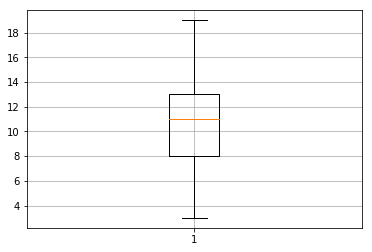

In [4]:
# 箱ひげ図を求める
plt.boxplot(student_data_math['G1'])
plt.grid(True)
plt.show()

## 変動係数
標準偏差を平均値で割った数。この値を使うとスケールに依存せず比較できるようになる
$$
 CV = \frac{\sigma}{\bar{x}}
$$

In [5]:
# 全データの平均を一気に算出する
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

In [6]:
# cov : 共分散の行列を算出する
#  G1とG3の共分散 : (1,2)と(2,1)の要素。12.188
# G1の分散 ; (1,1)の要素。11.017
# student_data_math['G1'].var()
# G3の分散 : (2,2)の要素。20.99
# student_data_math['G3'].var()
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

## 相関係数
$$
r_{xy} = \frac{\displaystyle{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\displaystyle{\sum_{i=1}^n(x_i - \bar{x})^2}}\sqrt{\displaystyle{\sum_{i=1}^n(y_i - \bar{y})^2}}}
$$

In [7]:
# corrcoef : 相関行列を算出する
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

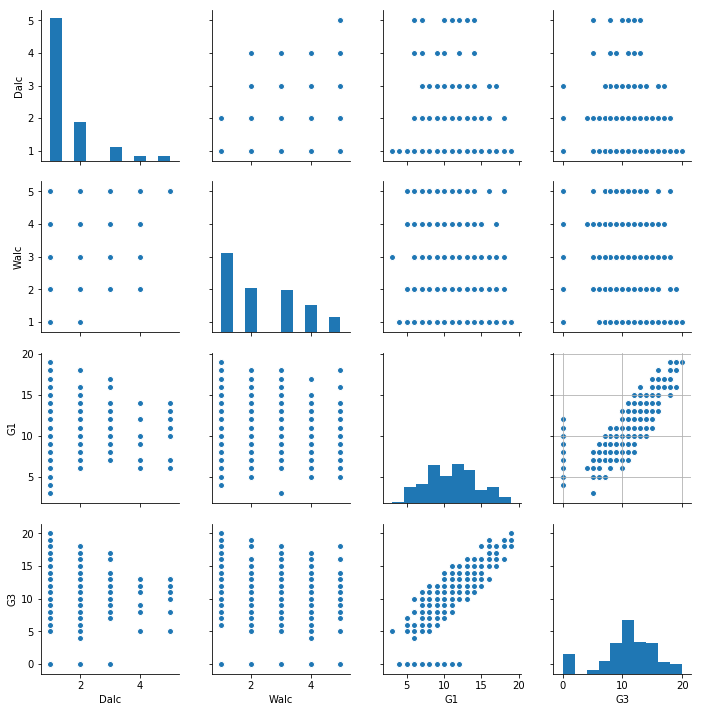

In [12]:
# pairplot : 全ての変数の散布図やヒストグラムを描く
sns.pairplot(student_data_math[['Dalc','Walc','G1','G3']])
plt.grid(True)